---

# **1. Import Libraries**

Let's start with importing essential libraries.

In [109]:
import numpy as np              # scientific computing
import pandas as pd             # high-performance data structures
import matplotlib.pyplot as plt # data visualization
import seaborn as sb            # high-level data visualization
import os

---

# **2. Raw Data**

Read the data `.csv` file and put it in a dataframe.

In [110]:
# Import data
cardio_raw = pd.read_csv('cardio_train.csv', sep=';')

# Take a look at some random data points from the dataset
cardio_raw.sample(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
48626,69437,20422,2,170,93.0,140,90,2,1,0,0,1,1
16691,23844,16107,1,166,68.0,110,70,1,1,0,0,1,0
10471,14936,22914,1,167,77.0,130,80,1,3,0,0,1,1
24816,35440,18242,2,160,88.0,130,90,3,1,0,1,1,1
67439,96298,19073,1,163,48.0,120,80,2,1,0,0,1,0
29680,42433,21215,1,156,50.0,120,70,1,1,1,0,0,0
29354,41949,22210,1,164,65.0,110,70,1,1,0,0,1,1
32915,47021,18404,1,162,66.0,120,80,1,1,0,0,1,0
61769,88195,15176,1,147,72.0,130,80,3,3,0,1,1,1
9523,13562,20973,1,150,52.0,140,90,1,1,0,0,1,1


Description of the dataset, as available on Kaggle, is as follows.<br>
Learn more: <a href='https://www.kaggle.com/sulianova/cardiovascular-disease-dataset'>https://www.kaggle.com/sulianova/cardiovascular-disease-dataset</a>

---

There are 3 types of input features:

> **Objective**: factual information;<br>
> **Examination**: results of medical examination;<br>
> **Subjective**: information given by the patient.

---

Features:

> **age** : Age | Objective Feature | age | int (days) |<br>
> **gender** : Gender | Objective Feature | gender | 1: women, 2: men |<br>
> **height** : Height | Objective Feature | height | int (cm) |<br>
> **weight** : Weight | Objective Feature | weight | float (kg) |<br>
> **ap_hi** : Systolic blood pressure | Examination Feature | ap_hi | int |<br>
> **ap_lo** : Diastolic blood pressure | Examination Feature | ap_lo | int |<br>
> **cholesterol** : Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |<br>
> **gluc** : Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |<br>
> **smoke** : Smoking | Subjective Feature | smoke | binary |<br>
> **alco** : Alcohol intake | Subjective Feature | alco | binary |<br>
> **active** : Physical activity | Subjective Feature | active | binary |<br>
> **cardio** : Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

---

All of the dataset values were collected at the moment of medical examination.

In [111]:
# Basic information about the dataset
cardio_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


There are 70,000 instances in the dataset, which is not bad for this Machine Learning project. There is no missing values in this dataset, so we don't have to worry about handling data loss.

---

# **3. Data Processing**

## 3.1 First Glance

Let's make a copy of the dataset to test as we have yet known whether the way we're going to preprocess it is more helpful for the training model or not.

In [112]:
# Create a copy of the dataset
cardio = cardio_raw.copy()

The `id` attribute is not a useful attribute which we can use in our Machine Learning model, so we need to remove this column.

There are **$5$ numerical** attributes which is `age`, `height`, `weight`, `ap_hi`, `ap_lo` and **$6$ categorical** attributes which is `gender`, `cholesterol`, `gluc`, `smoke`, `alco`, `active`. However, the pandas `.info()` method interpreted all attributes as numerical type. Therefore, we have to convert each of these categorical variables into “category” data type.

Also don't forget to convert the target variable `cardio` into "category" datatype.

In [113]:
# Remove the id column
cardio = cardio.drop(columns='id')

# Convert categorical variables into “category” data type
cat_attribs = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

# Create a list that contains numerical attributes
num_attribs = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Covert the data type of categorical attributes into "category"
for cat_attrib in cat_attribs:                                # iterate over each categorical attribute
  cardio[cat_attrib] = cardio[cat_attrib].astype('category')  # convert data type

The `describe()` method shows a summary of the numerical attributes.

In [114]:
# Summary of numerical attributes' statistics
cardio.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0


The `age` in the raw data is displayed in units of days, which seems unintuitive. It makes more sense to convert it to units of year.

In [115]:
# Convert the age into years
cardio['age'] = cardio['age'] // 365.25

Check the summary statistics visually using `boxplot()`.

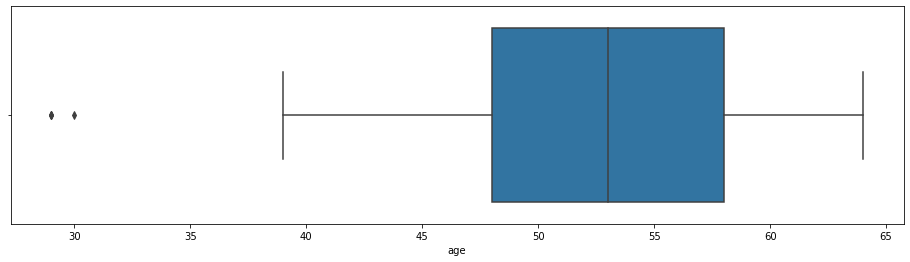

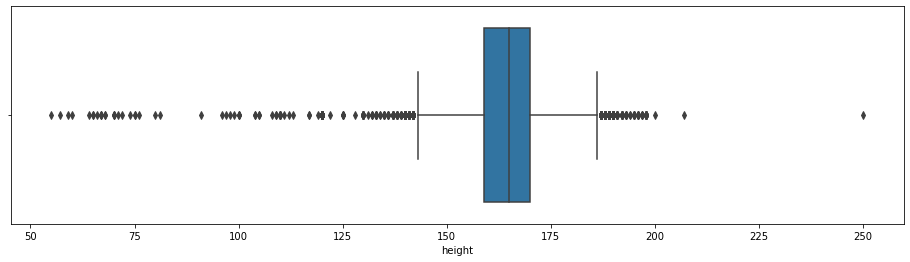

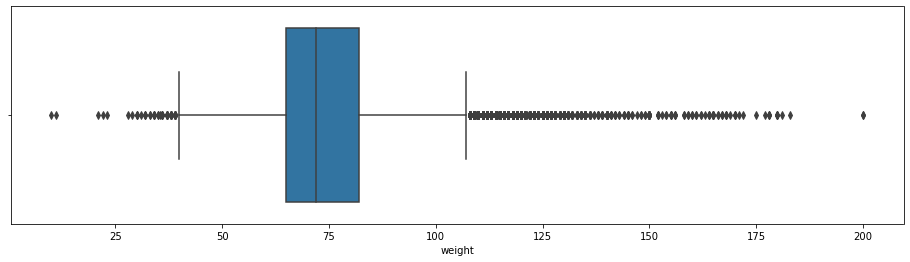

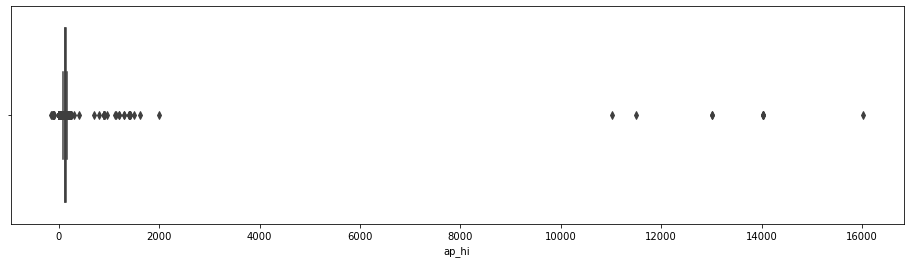

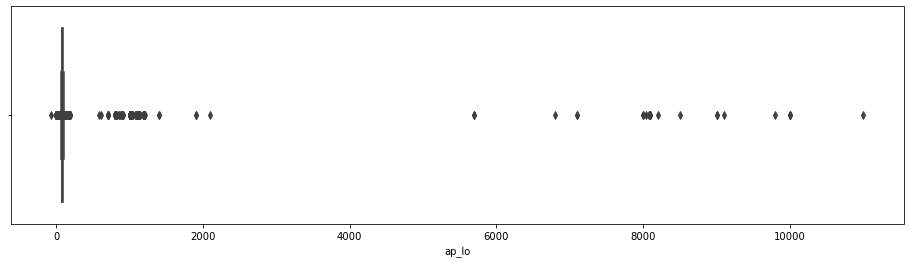

In [116]:
# Extract numerical attributes from the dataset
numeric_data = pd.DataFrame(cardio[num_attribs])

# Boxplot of the numeric data
for var in numeric_data:                          # iterate over numerical attributes
  fig, axes = plt.subplots(1, 1, figsize=(16,4))  # setup the frame of the plot
  sb.boxplot(data=cardio, x=var, orient='h')      # box plot

## 3.2 Blood Pressure

From the distribution graph of `ap_hi` and `ap_lo` we can see a lot of unusual values since the Systolic and Diastolic blood pressure is bounded between $40$ and $200 mmHg$.

$140 mmHg$ is already considered high blood pressure and values above $200$ shouldn't be humanly possible as it will cause blood vessel to rupture. $60 mmHg$ is considered low blood pressure and a change of $20 mmHg$ can cause fainting and dizziness.

One way to deal with this problem is to omit the training examples whose values ​​of `ap_hi` and `ap_lo` are outside the range $40-200 mmHg$. Let's see how many unusual training examples are there.

A stricter test is to make `ap_lo` in between $40-140 mmHg$

In [117]:
# Extract Systolic (ap_hi) and Diastolic (ap_lo) blood pressure
ap_hi = cardio['ap_hi']
ap_lo = cardio['ap_lo']

# Print number of unusual training examples
print("The number of training examples have ap_hi and ap_lo outside the range of 40-200mmHg")
cardio['cardio'].loc[(ap_hi < 40) | (ap_hi > 200) | (ap_lo < 40) | (ap_lo > 140)].count()

The number of training examples have ap_hi and ap_lo outside the range of 40-200mmHg


1303

### 3.2.1 Filter ap_hi, ap_lo

We can use condition test to filter out the data outside the range. And use boxplot to examine the distribution

<AxesSubplot:xlabel='ap_lo'>

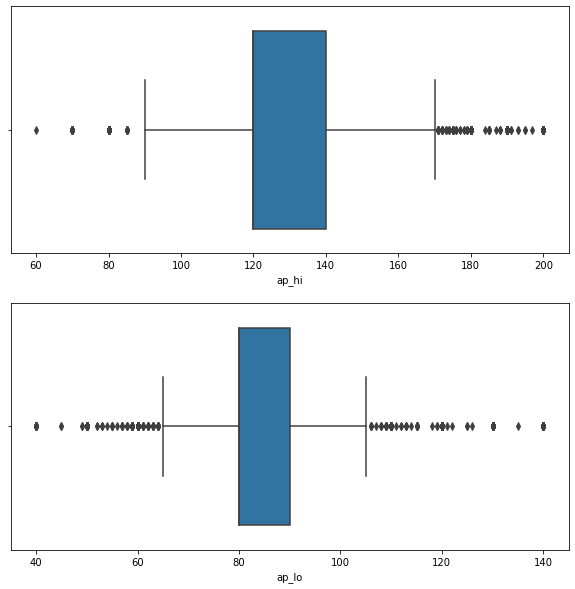

In [118]:
cardio1 = cardio.copy()

cardio1 = cardio1.drop(cardio.loc[(ap_hi < 40) | (ap_hi > 200) | (ap_lo < 40) | (ap_lo > 140)].index)
fig, ax = plt.subplots(nrows = 2, figsize = (10,10))
sb.boxplot(data = cardio1, x = "ap_hi", ax = ax[0], orient = 'h')
sb.boxplot(data = cardio1, x = "ap_lo", ax = ax[1], orient = 'h')

### 3.2.2 Categorize Blood Pressure

That's almost $2$% of the dataset!

We don't want to lose that much data just based on excluding training examples with abnormal blood pressure values. We have yet known if blood pressure is the dominant factor determining the outcome of the diagnosis. Therefore, we will go for another solution which is converting Systolic and Diastolic blood pressure to "category" data type.

The values ​​of blood pressure will be ranked as in the following table:

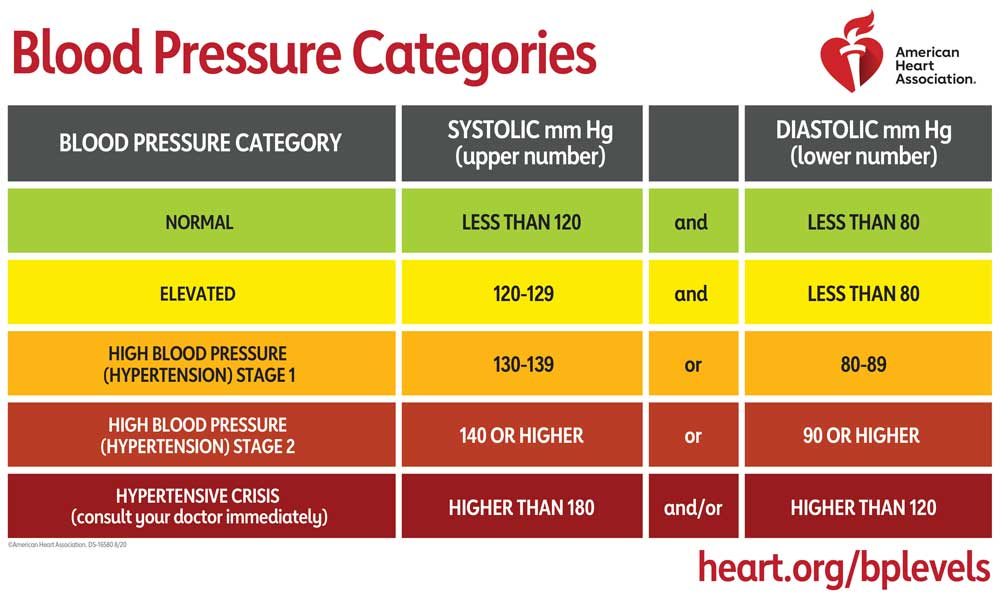

Assign the $5$ stages of the blood pressure category for the corresponding range from $1$ to $5$:


1.   Normal
2.   Elevated
3.   High blood pressure (hypertension) Stage $1$
4.   High blood pressure (hypertension) Stage $2$
5.   Hypertensive crisis (consult your doctor immediately)



In [119]:
# Rank Systolic blood pressure
cardio.loc[ap_hi < 120, 'ap_hi'] = 1
cardio.loc[(ap_hi >= 120) & (ap_hi < 130), 'ap_hi'] = 2
cardio.loc[(ap_hi >= 130) & (ap_hi < 140), 'ap_hi'] = 3
cardio.loc[(ap_hi >= 140) & (ap_hi <= 180), 'ap_hi'] = 4
cardio.loc[ap_hi > 180, 'ap_hi'] = 5

# Rank Diastolic blood pressure
cardio.loc[ap_lo < 80, 'ap_lo'] = 1
cardio.loc[(ap_lo >= 80) & (ap_lo < 90), 'ap_lo'] = 3
cardio.loc[(ap_lo >= 90) & (ap_lo <= 120), 'ap_lo'] = 4
cardio.loc[ap_lo > 120, 'ap_lo'] = 5

Rank blood pressure, append new column of blood pressure `bp` to `cardio` dataframe and drop `ap_hi`, `ap_lo` columns.

In [120]:
# Rank blood pressure and append it to the dataframe
bp = pd.DataFrame(cardio[['ap_hi', 'ap_lo']])
cardio['bp'] = bp.max(axis=1).astype('category')

# Drop ap_hi, ap_lo columns
cardio = cardio.drop(columns=['ap_hi', 'ap_lo'])

# Update categorical and numerical attributes
cat_attribs_bp = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bp', 'cardio']
num_attribs_bp = ['age', 'height', 'weight']

## 3.3 Distribution

### 3.3.1 Numerical features

Visualize the summary of uni-variate Distributions of each numerical attributes

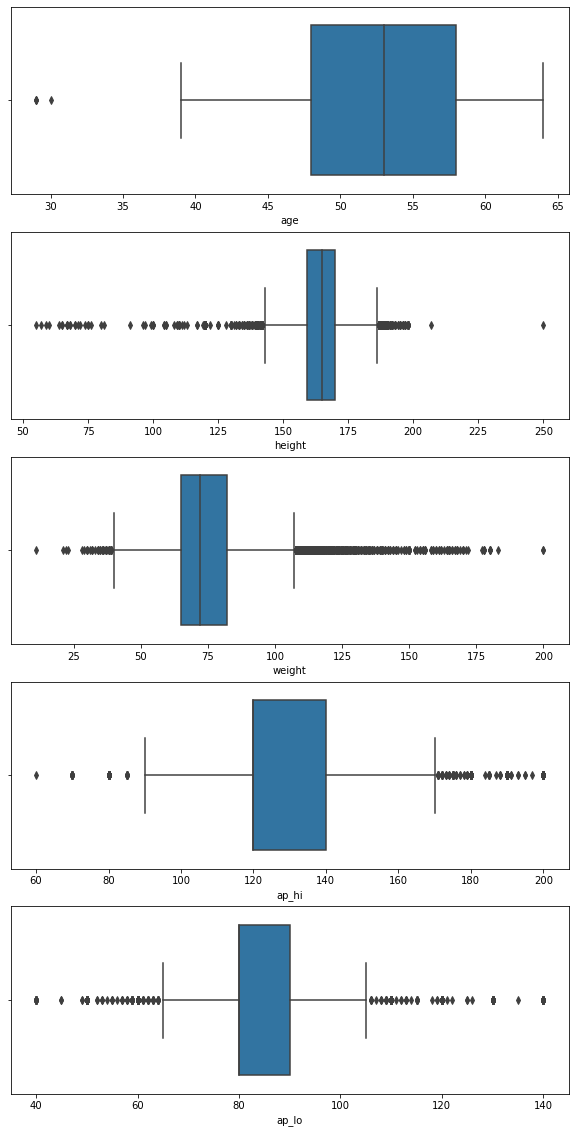

In [121]:
# Univariate analysis
fig,ax = plt.subplots(nrows = 5, figsize = (10,20))
count = 0
for attribs in num_attribs:                                     # iterate over numerical attributes
  sb.boxplot(data=cardio1, x=attribs, orient='h', ax=ax[count])    # box plot
  count +=1

The majority of patients whose information was provided in the dataset are:


*   Between the ages of $39$ and $64$ years old
*   Between the heights of $145$ and $185 cm$
*   Between the weights of $40$ and $105 kg$
*   ap_hi between 90 and 170
*   ap_lo between 65 and 105


It also can be seen that `height` and `weight` have a lot of outliers but these points are still in a reasonable range. For the purpose of learning, we will intentionally keep those outliers and see how they will affect the model.

### 3.3.2 Categorical features

Use `catplot()` to visualize the distribution of each category in a categorical attribute.

Change Gender variable
0 - Female
1 - Male

In [122]:
# Convert gender to binary categorical attribute
cardio['gender'] = (cardio['gender'].astype('int') - 1).astype('category')

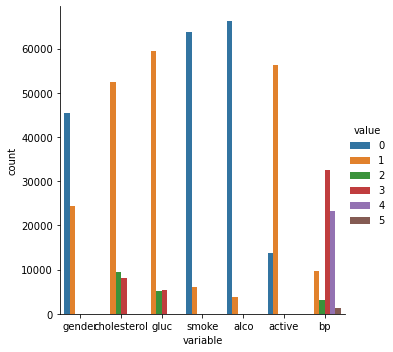

In [123]:
# Presence and absence of CVDs over each categorical attribute
cat_df = pd.melt(cardio, value_vars=cat_attribs_bp[:-1])        # dataframe of categorical attributes

sb.catplot(x='variable', hue='value', data=cat_df, kind='count')    # categorical plot

It seemed that in the dataset, the majority of people:


*   Have normal cholesterol and glucose level
*   Neither smoke nor drink alcohol
*   Regularly do physical activities
*   Have high blood pressure (either stage $1$ or $2$)

The ratio of female to male is $1.8:1$.

---

# **4. Correlation Exploration**

So far we have taken a glance at the data to get the general understanding. We have also cleaned the data to make it easier to use for the following steps.

Now we make a distinction based on the **Target variable**

## 4.1 Numerical features

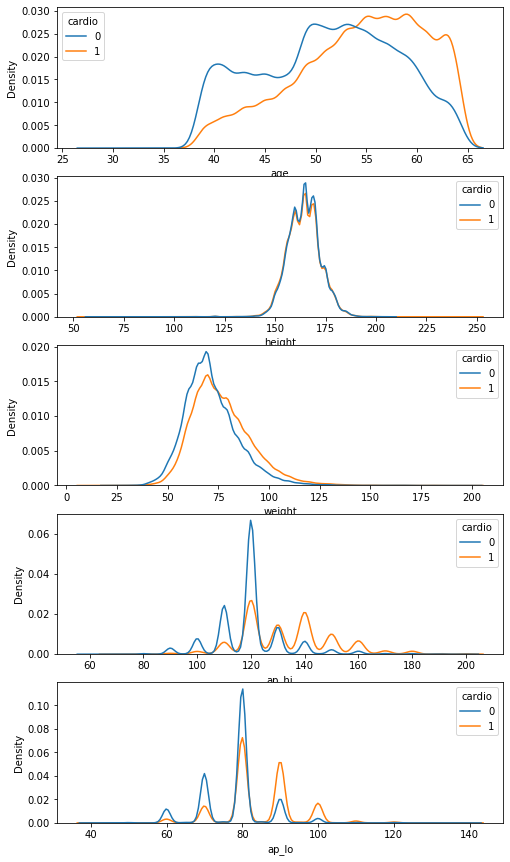

In [124]:
# Bivariate analysis with respect to target class
fig , ax = plt.subplots(nrows = len(num_attribs), figsize = (8,15))
count = 0
for number in num_attribs:
	sb.kdeplot(data = cardio1, x =number, hue = "cardio", ax = ax[count])
	count +=1

- Height:There is a considerable overlap
- Weight: Slight positive correlation
- Age: There is positive correlation. The older the patient is, the more they are at risk
- Ap_hi,ap_lo: Positive correlation. The higher the blood pressure, the more they are at risk

## 4.2 Categorical features

### 4.2.1 Overview 

Use `catplot()` to observe the correlations between categorical attributes and the target variable `cardio`.

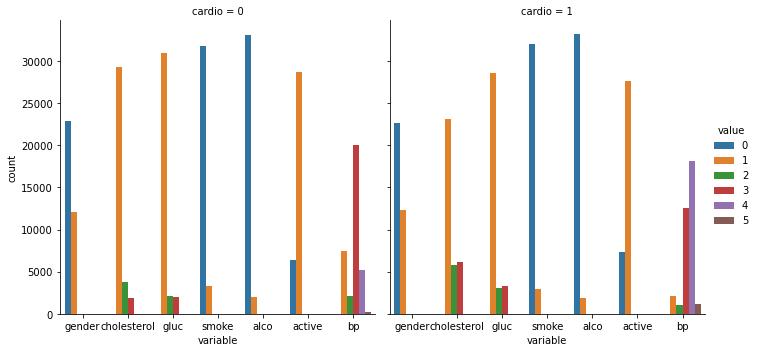

In [125]:
# Presence and absence of CVDs over each categorical attribute
cat_df = pd.melt(cardio, id_vars=['cardio'], value_vars=cat_attribs_bp[:-1])       # dataframe of categorical attributes
sb.catplot(x='variable', hue='value', col='cardio', data=cat_df, kind='count')  # categorical plot

Based on the Difference in ratio of the values of in 1 feature between people with and without disease
- Cholesterol & Glucose
	- Higher ratio of above normal and well above normal level
	- Positive correlation
- Smoke and Alcohol
	- No strong correlation
- Active
	- Slight Negative correlation

### 4.2.2 Individual features

Another way of doing this is by using `heatmap()`.

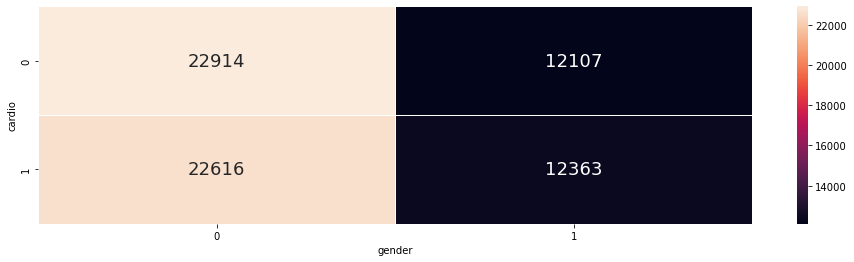

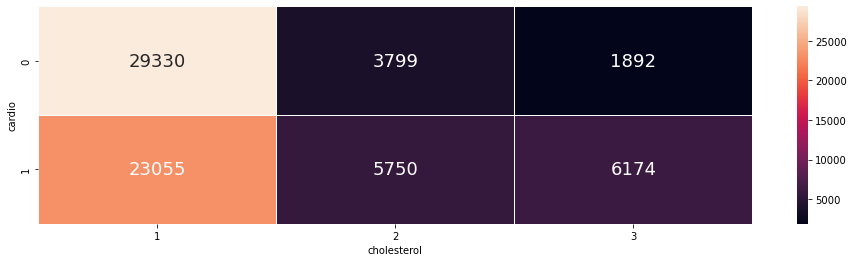

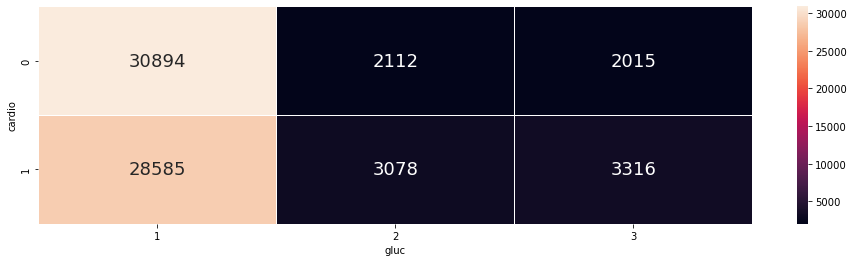

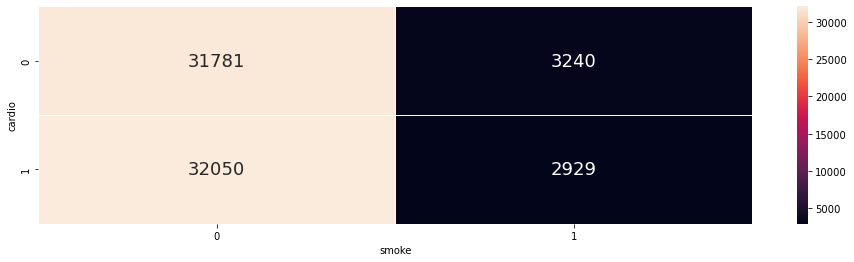

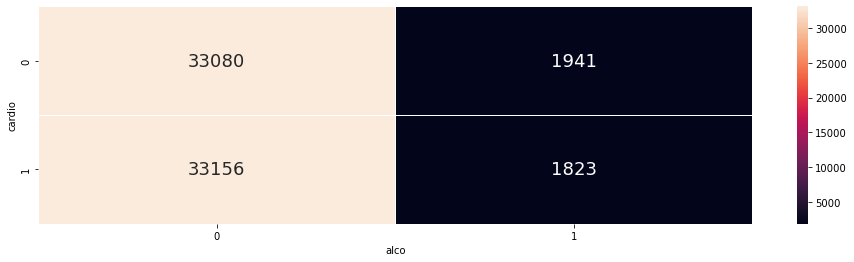

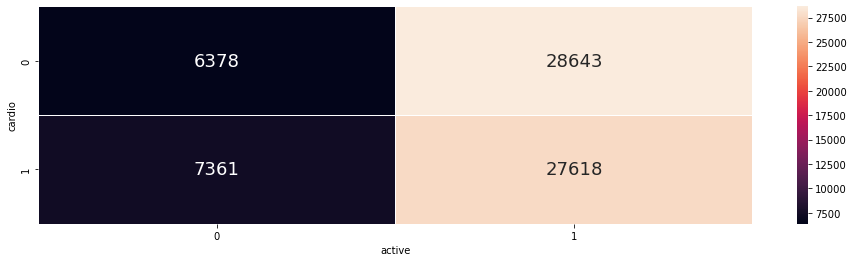

In [126]:
# The relationship between the presence and absence of CVDs and categorical attributes
for cat_attrib in cat_attribs[:-1]:                                       # iterate over categorical attributes
  fig ,axes = plt.subplots(1, 1, figsize=(16,4))                          # setup the frame of the plot
  sb.heatmap(cardio.groupby(['cardio', cat_attrib]).size().unstack(),
             linewidths=1, annot=True, annot_kws={'size': 18}, fmt='.0f') # heat map

The ratio of patients with CVD to those without is:


*   Approximately $1/1$ for both genders
*   Slightly smaller than $1$ among patients with normal cholesterol and/or glucose levels but noticable among patients with above and well above normal levels
*   Approximately the same for both smokers and non-smokers
*   Approximately the same for both patients who drink alcohol and who don't
*   Approximately the same for both active and inactive patients
*   Significant for each level of blood pressure:
    *   Normal: $1/3$
    *   Elevated: $1/2$
    *   High blood pressure Stage $1$: $2/3$
    *   High blood pressure Stage $2$: $7/2$
    *   Hypertensive crisis: $5/1$



## 4.3 Correlations

Let's take a look at the correlation matrix. Treating categorical features as float

C:\Users\HUY\AppData\Local\Temp/ipykernel_11676/1828773187.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

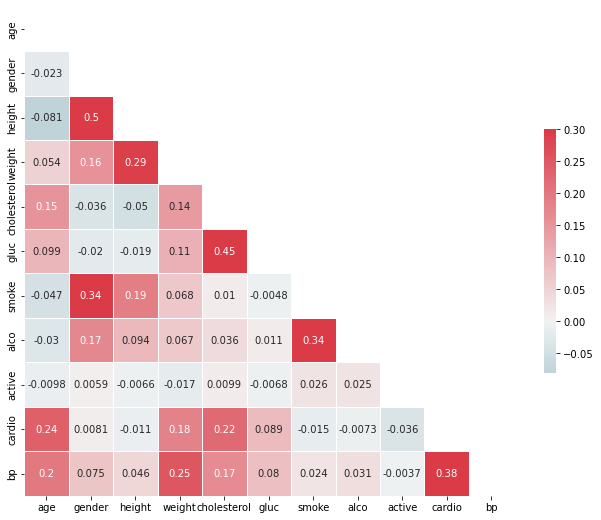

In [127]:
# Calculate the correlations between attributes
corr = cardio.astype('float').corr()
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, axes = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

It seems like blood pressure (`bp`) has the highest correlation with the target class. Followed by `age`, `cholesterol` and `weight`, but the correlation is still not very high

## 4.4 Export databp.csv for 2_Model.ipynb

Export the data with Blood Pressure category for Model Exploration

In [128]:
cardio.to_csv('databp.csv', index = False)

---
# **5. Clustering**

We can try out various attribute combinations before preparing the data for Machine Learning algorithm to see whether those combinations are seemed to be more useful than a bunch of separeted attributes.<br>

Let's make a copy of the dataset to test as we don't know if the attribute combinations that we're going to create are more helpful for the training model or not. And if they're not, we don't want that to affect the original dataset.

In [129]:
# Create a copy of the dataset
cardio_exp = cardio.copy()

## 5.1 Body Mass Index (BMI)

Here, we consider the [Body Mass Index (BMI)](https://en.wikipedia.org/wiki/Body_mass_index) of the patient, which can be derived from the formula:<br>

$$BMI = \frac{weight}{height \times height}$$

,where $weight$ is the weight of the patient in the units of $kilogram$ ($kg$), $height$ is the height of the patient in the units of $meter$ ($m$).

With the above formula, we will calculate and introduce a new attribute `bmi`.

<AxesSubplot:xlabel='bmi'>

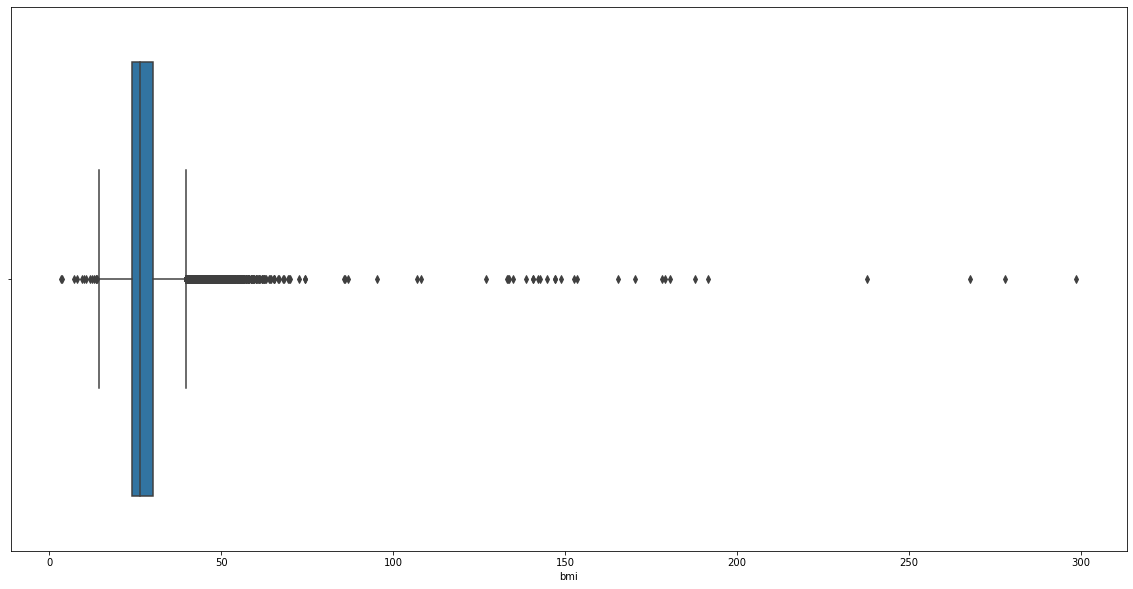

In [130]:
# Caculate bmi for every patients
cardio_exp['bmi'] = cardio_exp['weight'] / (cardio_exp['height'] / 100) ** 2

fig = plt.figure(figsize = (20,10))
sb.boxplot(data=cardio_exp, x='bmi', orient='h')    # box plot

There are many outliers in BMI
The humanly possible value of BMI is between 10 and 80

<AxesSubplot:xlabel='bmi'>

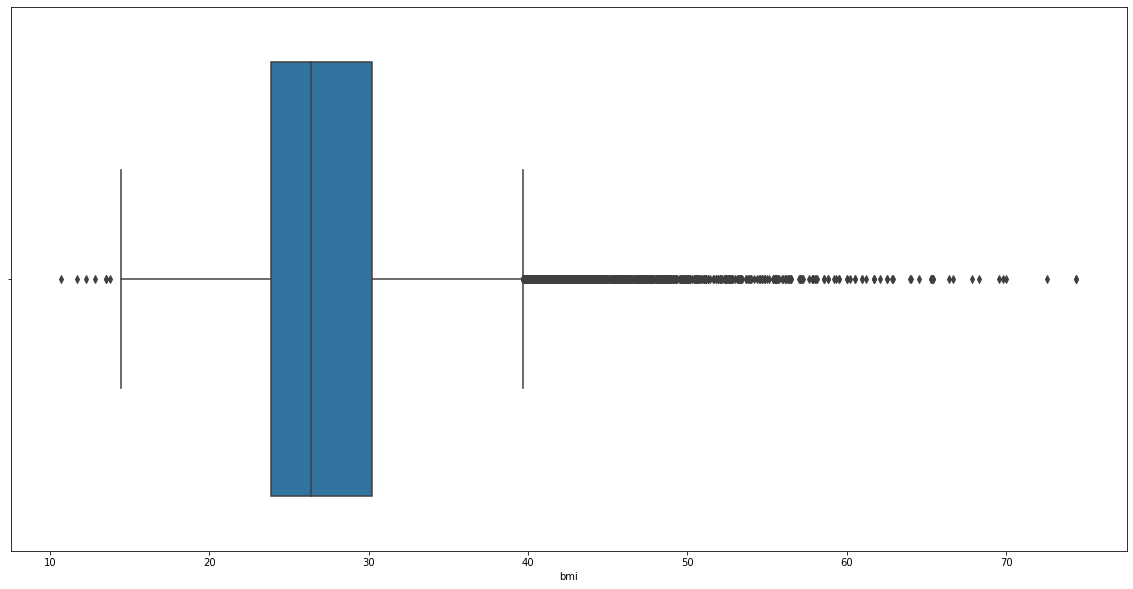

In [131]:
# Extract feature bmi from the dataset
bmi = cardio_exp['bmi']

cardio_exp = cardio_exp.drop(cardio_exp.loc[(bmi < 10) | (bmi > 80)].index)
bmi = cardio_exp['bmi']

fig = plt.figure(figsize = (20,10))
sb.boxplot(data=cardio_exp, x='bmi', orient='h')    # box plot


From BMI, we can construct categories of obesity, which is more commonly use. The categories of this categorical attribute are as follow:


0.   Underweight ($BMI < 18.5$)
1.   Healthy Weight ($18.5 <= BMI < 25$)
2.   Overweight ($25 <= BMI < 30$)
3.   Obese ($BMI >= 30$)



In [132]:
# Rank BMI
cardio_exp['obesity'] = 0                                 # initiate every training examples to underweight
cardio_exp.loc[(bmi >= 18.5) & (bmi < 25), 'obesity'] = 1 # healthy weight
cardio_exp.loc[(bmi >= 25) & (bmi < 30), 'obesity'] = 2   # overweight
cardio_exp.loc[bmi >= 30, 'obesity'] = 3                  # obese

# Change data type to 'category'
cardio_exp['obesity'] = cardio_exp['obesity'].astype('category')

The distribution of categorical attribute `obesity`.

Stage of Obesity: 4
1    25790
2    25086
3    18441
0      644
Name: obesity, dtype: int64


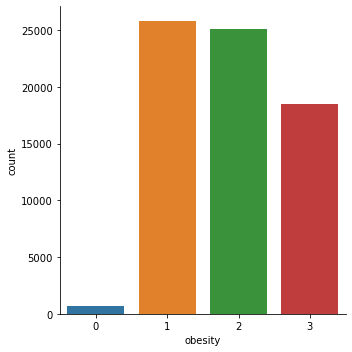

In [133]:
# Print the number of unique categories in bmi
print("Stage of Obesity:", len(cardio_exp['obesity'].unique()))

# Plot the count of each category in bmi
print(cardio_exp['obesity'].value_counts())             # count the number of each category
sb.catplot(x='obesity', data=cardio_exp, kind='count')  # categorical plot

We can take a look on how this new feature `obesity` correlates with the target variable `cardio` using `heatmap()`.

<AxesSubplot:xlabel='obesity', ylabel='cardio'>

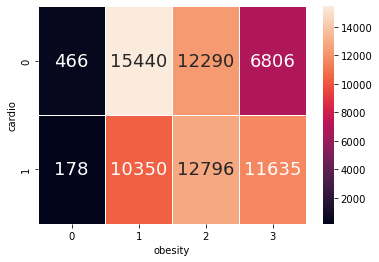

In [134]:
# Plot heatmap between target class and obesity
sb.heatmap(cardio_exp.groupby(['cardio', 'obesity']).size().unstack(),
           linewidths=1, annot=True, annot_kws={'size': 18}, fmt='.0f')

Base on the obesity rating we observe that:


*   For underweight and healthy patients, the majority don't have disease
*   For overweight patients, the number of people have and don't have disease is about the same
*   For obese patients, the majority has disease


There is a **positive** relationship

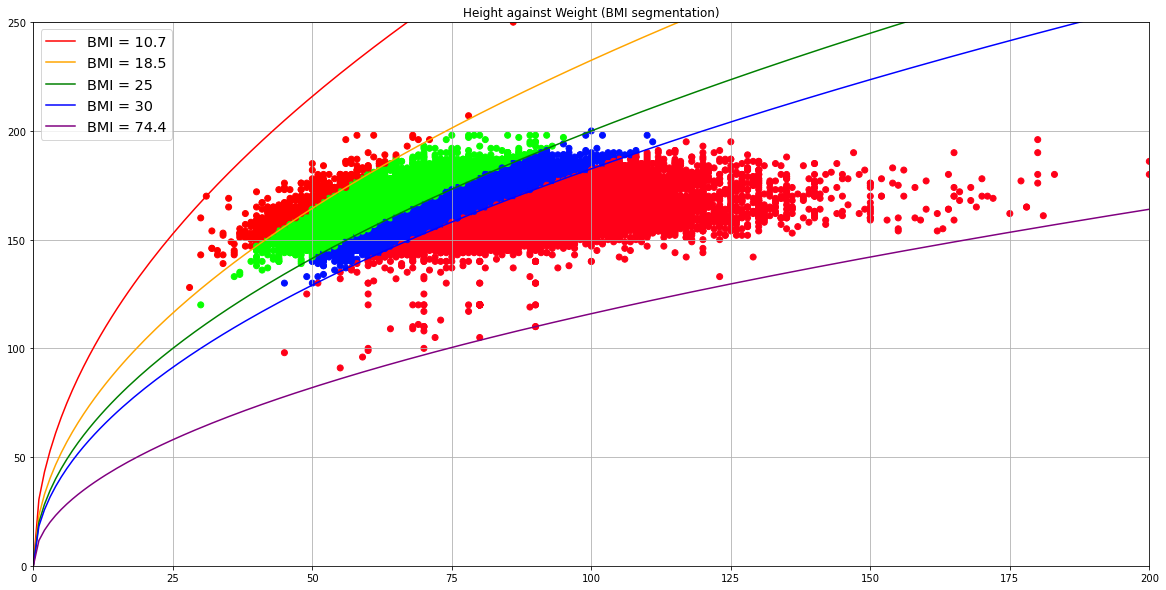

In [135]:
# Plot the BMI graph for visualization
fig = plt.figure(figsize = (20,10))
plt.scatter(x='weight', y='height', c='obesity', data=cardio_exp, cmap='hsv', label="")

x_val = np.arange(0,300)
plt.plot(x_val,np.sqrt(x_val/bmi.min())*100, c='red', label="BMI = "+str(round(bmi.min(),1)))
plt.plot(x_val,np.sqrt(x_val/18.5)*100, c='orange', label="BMI = 18.5")
plt.plot(x_val,np.sqrt(x_val/25)*100, c='green', label="BMI = 25")
plt.plot(x_val,np.sqrt(x_val/30)*100, c='blue', label="BMI = 30")
plt.plot(x_val,np.sqrt(x_val/bmi.max())*100, c='purple', label="BMI = "+str(round(bmi.max(),1)))

plt.xlim([0, cardio_exp['weight'].max()])
plt.ylim([0, cardio_exp['height'].max()])
plt.title("Height against Weight (BMI segmentation)")
plt.legend(fontsize='x-large')
plt.grid(True)
plt.show()

## 5.2 K-means Clustering

From the perspective of categorical separation:
- Blood pressure categories is a threshold separation
- BMI uses analytical function (quadratic) function to separate data

However, with machine learning clustering algorithm, we can cluster large number of data and multi dimensional data. 

We will try K-means. [K-means Clustering](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) uses distance between points to cluster them.

### 5.2.1 K-means on Height, Weight


We want to scale the data because we don't want the range of any feature affecting the distance from the centroid calculated

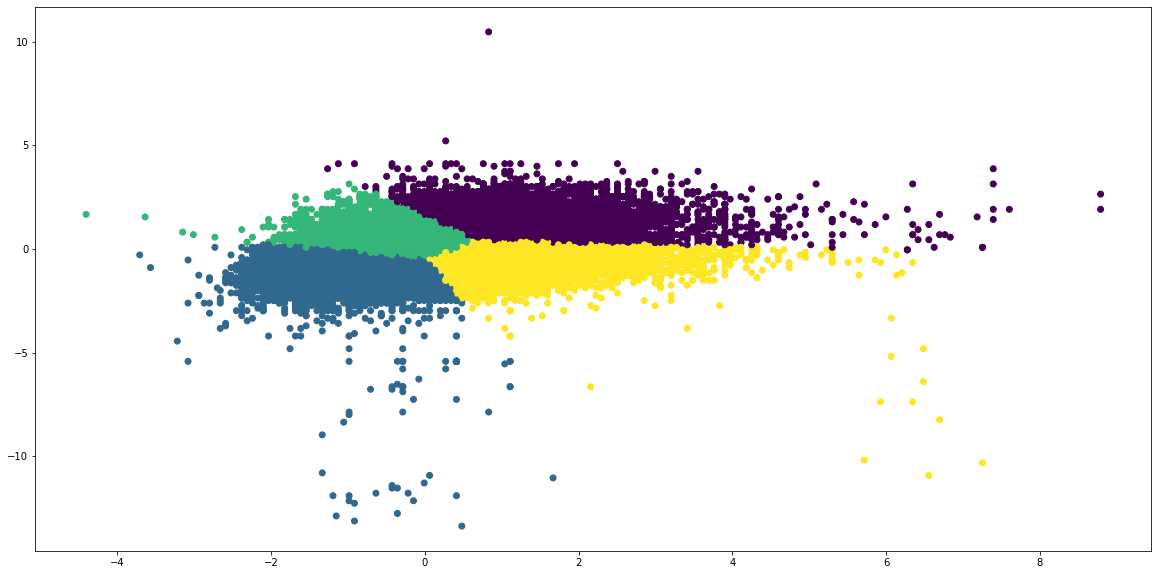

In [136]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Scale
scale = StandardScaler()


hw = pd.DataFrame(cardio1[["weight","height"]])
hw[["weight","height"]] = scale.fit_transform(hw[["weight","height"]])

# KMeans Clustering model
kmean = KMeans(n_clusters=4, init='k-means++', n_init=10) # create kmeans clustering object
kmean.fit(hw)                                             # train the kmeans clustering model

# Predict clusters
labels = kmean.predict(hw)
hw_cluster = hw.copy()
hw_cluster['Cluster'] = pd.Categorical(labels)

# Visualize clusters using scatter plot
fig1 = plt.figure(figsize = (20,10))
plt.scatter(x='weight', y='height', c='Cluster', data=hw_cluster)

### 5.2.2 K-means on numerical features
We will now implement k-means on all 5 numerical features, taking advantage of the the algorithm ability to deal with multi-dimension variables

<AxesSubplot:xlabel='Cluster', ylabel='count'>

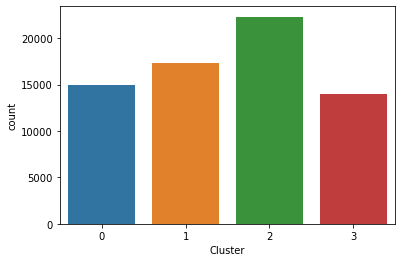

In [137]:
# Extract the Features from the Data
X = pd.DataFrame(cardio1[num_attribs]) 
X[num_attribs] = scale.fit_transform(X[num_attribs])
# Guess the Number of Clusters
num_clust = 4

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust, init = 'k-means++', n_init = 5)

# Fit the Clustering Model on the Data
kmeans.fit(X)

labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(x=X_labeled["Cluster"])

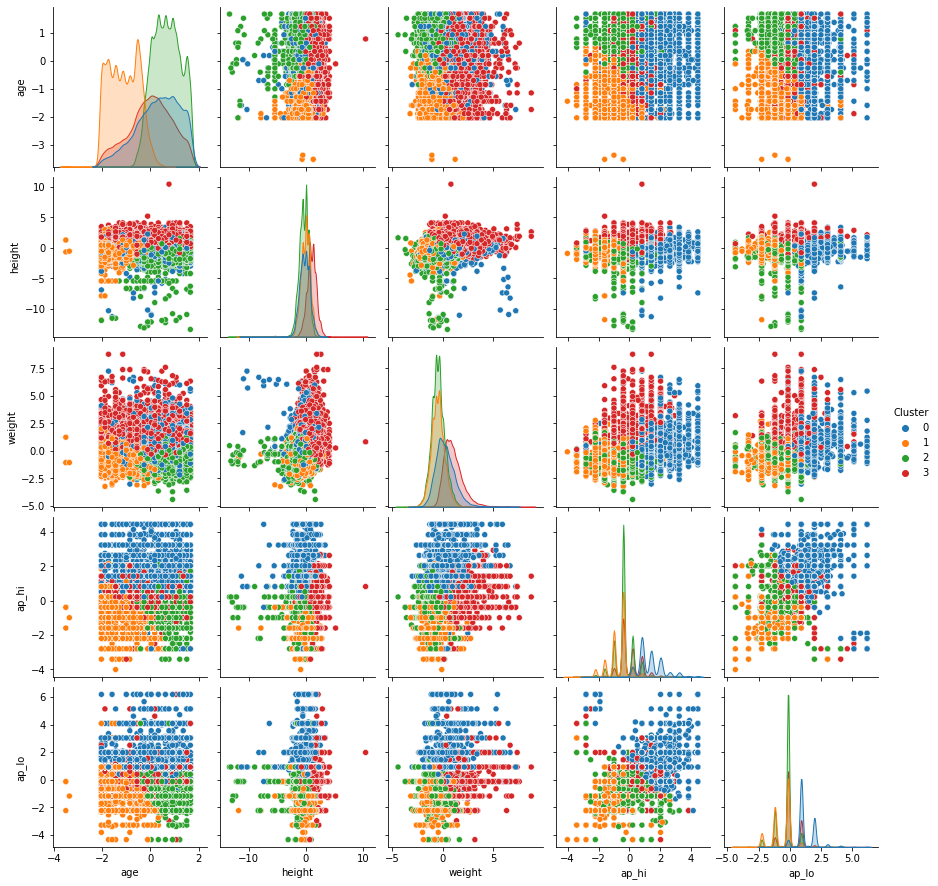

In [138]:
# Plot the Clusters on 2D grids
sb.pairplot(X_labeled, vars = X.columns.values, hue = "Cluster")

As seen in the BMI graph and due to BMI calculation, BMI clusters are segmented using the a quadratic formula:

$$BMI = \frac{weight}{height \times height}$$


K-means clustering method finds a center point of a cluster. Therefore, it cannot produce the curves like BMI calculation


BMI and threshold categorisation are intuitive and are done by human. They are the result of human effort in categorising data prior to the advent of ML (BMI in 19th century). Like machine learning, people try to learn and pick out the pattern from various data. The model the originator of BMI used was a simple quadratic formula. However, in the past, they lack the tools for big data collection and analysis. Hence many even questioned the effectiveness of BMI.


We see that there is a slight correlation with disease as explored earlier, some are questioning the usefulness of such a simplistic BMI calculation to categorize
Hence, it stills serve as a good rules of thumb.

For the clusters that we find using 5 features, we cannot validate their relevance because we are not medical professionals.